# Load in require library


In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, auc,precision_recall_curve, mean_squared_error, classification_report, confusion_matrix, r2_score, f1_score, accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import MultinomialNB
# plot charts inline
%matplotlib inline

# Machine Learning Model

In [2]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, GradientBoostingRegressor, RandomForestRegressor, BaggingRegressor
import xgboost as xgb 
import lightgbm as lgb

/Users/hankchen/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [3]:
#read data
data=pd.read_csv('/Users/hankchen/Desktop/semester 2/637/Final_project/medicare-skilled-nursing-facility-snf-provider-aggregate-report-cy-2015.csv')
data.head()

,Provider ID,Facility Name,Street Address,City,State,Zip Code,Total Stays,Distinct Beneficiaries Per Provider,Average Length of Stay (Days),Total SNF Charge Amount,...,Percent of Beneficiaries with COPD,Percent of Beneficiaries with Depression,Percent of Beneficiaries with Diabetes,Percent of Beneficiaries with Hyperlipidemia,Percent of Beneficiaries with Hypertension,Percent of Beneficiaries with IHD,Percent of Beneficiaries with Osteoporosis,Percent of Beneficiaries with RA/OA,Percent of Beneficiaries with Schizophrenia,Percent of Beneficiaries with Stroke
0,10022,CHEROKEE MEDICAL CENTER,400 NORTHWOOD DR,CENTRE,AL,35960,95,85,13.9,3787309,...,39.0,52.0,45.0,74.0,NaN,55.0,14.0,72.0,11.0,7.0
1,10032,WEDOWEE HOSPITAL,209 NORTH MAIN STREET,WEDOWEE,AL,36278,20,19,10.6,436623,...,NaN,21.0,53.0,58.0,NaN,74.0,16.0,63.0,16.0,21.0
2,10044,MARION REGIONAL MEDICAL CENTER,1256 MILITARY STREET SOUTH,HAMILTON,AL,35570,164,144,15.4,5906115,...,44.0,42.0,50.0,72.0,NaN,62.0,16.0,60.0,10.0,13.0
3,10045,FAYETTE MEDICAL CENTER,1653 TEMPLE AVENUE NORTH,FAYETTE,AL,35555,124,110,16.0,2748027,...,42.0,34.0,38.0,71.0,NaN,58.0,13.0,75.0,15.0,16.0
4,10058,BIBB MEDICAL CENTER,208 PIERSON AVE,CENTREVILLE,AL,35042,90,85,17.4,1679414,...,34.0,40.0,56.0,65.0,NaN,45.0,11.0,59.0,11.0,20.0


In [4]:
len(data[data['Average HCC Score']>3])

2311

In [5]:
len(data)

15026

In [6]:
# feature names as a list
col = data.columns       # .columns gives columns names in data 
print(col)

Index(['Provider ID', 'Facility Name', 'Street Address', 'City', 'State',
       'Zip Code', 'Total Stays', 'Distinct Beneficiaries Per Provider',
       'Average Length of Stay (Days)', 'Total SNF Charge Amount',
       'Total SNF Medicare Allowed Amount',
       'Total SNF Medicare Payment Amount',
       'Total SNF Medicare Standard Payment Amount', 'Average Age',
       'Male Beneficiaries', 'Female Beneficiaries', 'Nondual Beneficiaries',
       'Dual Beneficiaries', 'White Beneficiaries', 'Black Beneficiaries',
       'Asian Pacific Islander Beneficiaries', 'Hispanic Beneficiaries',
       'American Indian or Alaska Native Beneficiaries',
       'Other/ Unknown Beneficiaries', 'Average HCC Score',
       'Percent of Beneficiaries with Atrial Fibrillation',
       'Percent of Beneficiaries with Alzheimer's',
       'Percent of Beneficiaries with Asthma',
       'Percent of Beneficiaries with Cancer',
       'Percent of Beneficiaries with CHF',
       'Percent of Beneficiaries with

In [7]:
#check column type and missing value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15026 entries, 0 to 15025
Data columns (total 41 columns):
Provider ID                                             15026 non-null int64
Facility Name                                           15026 non-null object
Street Address                                          15026 non-null object
City                                                    15026 non-null object
State                                                   15026 non-null object
Zip Code                                                15026 non-null int64
Total Stays                                             15026 non-null int64
Distinct Beneficiaries Per Provider                     15026 non-null int64
Average Length of Stay (Days)                           15026 non-null float64
Total SNF Charge Amount                                 15026 non-null int64
Total SNF Medicare Allowed Amount                       15026 non-null int64
Total SNF Medicare Payment Amount     

In [8]:
#drop object column
data.drop(data.select_dtypes(['object']), inplace=True, axis=1)
#drop not important column
data.drop(['Provider ID', 'Zip Code' ],inplace=True, axis=1)

In [9]:
pd.set_option('display.max_columns', 500)

In [10]:
data.head()

,Total Stays,Distinct Beneficiaries Per Provider,Average Length of Stay (Days),Total SNF Charge Amount,Total SNF Medicare Allowed Amount,Total SNF Medicare Payment Amount,Total SNF Medicare Standard Payment Amount,Average Age,Male Beneficiaries,Female Beneficiaries,Nondual Beneficiaries,Dual Beneficiaries,White Beneficiaries,Black Beneficiaries,Asian Pacific Islander Beneficiaries,Hispanic Beneficiaries,American Indian or Alaska Native Beneficiaries,Other/ Unknown Beneficiaries,Average HCC Score,Percent of Beneficiaries with Atrial Fibrillation,Percent of Beneficiaries with Alzheimer's,Percent of Beneficiaries with Asthma,Percent of Beneficiaries with Cancer,Percent of Beneficiaries with CHF,Percent of Beneficiaries with Chronic Kidney Disease,Percent of Beneficiaries with COPD,Percent of Beneficiaries with Depression,Percent of Beneficiaries with Diabetes,Percent of Beneficiaries with Hyperlipidemia,Percent of Beneficiaries with Hypertension,Percent of Beneficiaries with IHD,Percent of Beneficiaries with Osteoporosis,Percent of Beneficiaries with RA/OA,Percent of Beneficiaries with Schizophrenia,Percent of Beneficiaries with Stroke
0,95,85,13.9,3787309,536155,514893,645028,78,32.0,53.0,70.0,15.0,83.0,NaN,0.0,0.0,0.0,NaN,1.71,20.0,40.0,34.0,12.0,39.0,51.0,39.0,52.0,45.0,74.0,NaN,55.0,14.0,72.0,11.0,7.0
1,20,19,10.6,436623,75762,75762,94249,82,NaN,NaN,NaN,NaN,15.0,NaN,0.0,0.0,0.0,NaN,2.03,11.0,32.0,42.0,11.0,58.0,47.0,NaN,21.0,53.0,58.0,NaN,74.0,16.0,63.0,16.0,21.0
2,164,144,15.4,5906115,946310,913116,1142756,77,46.0,98.0,102.0,42.0,135.0,NaN,0.0,0.0,0.0,NaN,1.90,19.0,31.0,33.0,13.0,49.0,52.0,44.0,42.0,50.0,72.0,NaN,62.0,16.0,60.0,10.0,13.0
3,124,110,16.0,2748027,828039,807406,1006830,79,38.0,72.0,73.0,37.0,98.0,12.0,0.0,0.0,0.0,0.0,1.71,35.0,40.0,30.0,20.0,67.0,59.0,42.0,34.0,38.0,71.0,NaN,58.0,13.0,75.0,15.0,16.0
4,90,85,17.4,1679414,656639,604009,713803,76,35.0,50.0,54.0,31.0,70.0,13.0,0.0,NaN,0.0,NaN,2.24,16.0,36.0,21.0,13.0,53.0,59.0,34.0,40.0,56.0,65.0,NaN,45.0,11.0,59.0,11.0,20.0


In [11]:
data.shape

(15026, 35)

In [12]:
#check missing values
data.isnull().mean()

Total Stays                                             0.000000
Distinct Beneficiaries Per Provider                     0.000000
Average Length of Stay (Days)                           0.000000
Total SNF Charge Amount                                 0.000000
Total SNF Medicare Allowed Amount                       0.000000
Total SNF Medicare Payment Amount                       0.000000
Total SNF Medicare Standard Payment Amount              0.000000
Average Age                                             0.000000
Male Beneficiaries                                      0.104619
Female Beneficiaries                                    0.104619
Nondual Beneficiaries                                   0.187741
Dual Beneficiaries                                      0.187741
White Beneficiaries                                     0.025955
Black Beneficiaries                                     0.410821
Asian Pacific Islander Beneficiaries                    0.366365
Hispanic Beneficiaries   

In [13]:
data.describe()

,Total Stays,Distinct Beneficiaries Per Provider,Average Length of Stay (Days),Total SNF Charge Amount,Total SNF Medicare Allowed Amount,Total SNF Medicare Payment Amount,Total SNF Medicare Standard Payment Amount,Average Age,Male Beneficiaries,Female Beneficiaries,Nondual Beneficiaries,Dual Beneficiaries,White Beneficiaries,Black Beneficiaries,Asian Pacific Islander Beneficiaries,Hispanic Beneficiaries,American Indian or Alaska Native Beneficiaries,Other/ Unknown Beneficiaries,Average HCC Score,Percent of Beneficiaries with Atrial Fibrillation,Percent of Beneficiaries with Alzheimer's,Percent of Beneficiaries with Asthma,Percent of Beneficiaries with Cancer,Percent of Beneficiaries with CHF,Percent of Beneficiaries with Chronic Kidney Disease,Percent of Beneficiaries with COPD,Percent of Beneficiaries with Depression,Percent of Beneficiaries with Diabetes,Percent of Beneficiaries with Hyperlipidemia,Percent of Beneficiaries with Hypertension,Percent of Beneficiaries with IHD,Percent of Beneficiaries with Osteoporosis,Percent of Beneficiaries with RA/OA,Percent of Beneficiaries with Schizophrenia,Percent of Beneficiaries with Stroke
count,15026.00000,15026.000000,15026.000000,1.502600e+04,1.502600e+04,1.502600e+04,1.502600e+04,15026.000000,13454.000000,13454.000000,12205.000000,12205.000000,14636.000000,8853.000000,9521.000000,7889.000000,11431.000000,5263.000000,15026.000000,15026.000000,14088.000000,15026.000000,15026.000000,14816.000000,14504.000000,14999.000000,14553.000000,14884.000000,13024.000000,218.000000,13950.000000,15024.000000,14193.000000,14879.000000,15026.000000
mean,167.33635,133.466791,27.601185,3.014493e+06,2.215277e+06,1.829095e+06,1.882465e+06,78.622854,57.158094,89.156979,98.294961,54.847440,112.072902,21.306111,1.934671,8.935480,0.315283,0.287289,2.459436,12.083252,25.060027,11.855633,6.989132,24.534603,27.667098,18.013993,24.378678,21.988499,33.476793,68.857142,29.017095,8.508699,27.487862,9.460547,8.301379
std,152.98759,125.047301,7.182299,3.320673e+06,2.164451e+06,1.846626e+06,1.761173e+06,4.675007,47.146511,81.328980,108.621510,41.677151,109.581422,36.115827,10.837733,23.922898,3.457323,2.360015,0.607989,13.896679,26.320083,13.664768,8.259165,26.230802,29.023354,20.405975,26.107670,24.139801,31.809295,11.414546,29.139588,10.478515,28.661226,12.986628,9.846328
min,11.00000,11.000000,1.800000,3.030100e+04,8.085000e+03,7.298000e+03,6.596000e+03,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,0.000000,0.000000,0.000000,0.000000,0.045450,0.045450,0.000000,0.058820,0.043480,0.125000,0.666670,0.130430,0.000000,0.000000,0.000000,0.000000
25%,65.00000,51.000000,23.200000,1.027863e+06,8.133378e+05,6.445695e+05,7.109540e+05,76.000000,25.000000,36.000000,30.000000,27.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.050000,0.256410,0.492482,0.241240,0.145830,0.521370,0.578950,0.365080,0.496820,0.462780,0.646540,68.000000,0.580062,0.167715,0.566430,0.153060,0.172730
50%,123.00000,96.000000,27.200000,2.043838e+06,1.591302e+06,1.279088e+06,1.395871e+06,79.000000,43.000000,64.000000,61.000000,46.000000,78.000000,12.000000,0.000000,0.000000,0.000000,0.000000,2.360000,0.372090,0.742775,0.359380,0.218750,0.676595,0.717950,0.533330,0.687500,0.642860,46.000000,72.000000,28.000000,0.294120,0.729510,0.380000,0.272730
75%,218.00000,173.000000,31.800000,3.820889e+06,2.890074e+06,2.375135e+06,2.470780e+06,82.000000,73.000000,112.000000,123.000000,71.000000,144.000000,28.000000,0.000000,12.000000,0.000000,0.000000,2.760000,25.000000,50.000000,24.000000,15.000000,51.000000,58.000000,37.000000,50.000000,45.000000,65.000000,74.000000,58.000000,17.000000,56.000000,16.000000,17.000000
max,2176.00000,1889.000000,65.900000,9.818145e+07,3.005788e+07,2.531182e+07,2.117119e+07,92.000000,619.000000,1270.000000,1645.000000,625.000000,1630.000000,570.000000,244.000000,555.000000,119.000000,57.000000,8.630000,61.000000,75.000000,69.000000,55.000000,75.000000,75.00000

In [14]:
label=[]
for i in range(len(data)):
    if data['Average HCC Score'][i]>3:
        label.append(1)
    else:
        label.append(0)


In [15]:
data1=data.drop(['Other/ Unknown Beneficiaries','Percent of Beneficiaries with Hypertension'], axis=1)
data1=data1.fillna(0)

In [16]:
#normalized the data
mms=MinMaxScaler()
mms.fit(data)
data_scale=mms.transform(data)
data_scale=pd.DataFrame(data_scale, columns=data.columns)

mms.fit(data1)
data1_scale=mms.transform(data1)
data1_scale=pd.DataFrame(data1_scale, columns=data1.columns)

In [17]:
data1_scale['label']=label
data_scale['label']=label

In [18]:
data_scale.head()

,Total Stays,Distinct Beneficiaries Per Provider,Average Length of Stay (Days),Total SNF Charge Amount,Total SNF Medicare Allowed Amount,Total SNF Medicare Payment Amount,Total SNF Medicare Standard Payment Amount,Average Age,Male Beneficiaries,Female Beneficiaries,Nondual Beneficiaries,Dual Beneficiaries,White Beneficiaries,Black Beneficiaries,Asian Pacific Islander Beneficiaries,Hispanic Beneficiaries,American Indian or Alaska Native Beneficiaries,Other/ Unknown Beneficiaries,Average HCC Score,Percent of Beneficiaries with Atrial Fibrillation,Percent of Beneficiaries with Alzheimer's,Percent of Beneficiaries with Asthma,Percent of Beneficiaries with Cancer,Percent of Beneficiaries with CHF,Percent of Beneficiaries with Chronic Kidney Disease,Percent of Beneficiaries with COPD,Percent of Beneficiaries with Depression,Percent of Beneficiaries with Diabetes,Percent of Beneficiaries with Hyperlipidemia,Percent of Beneficiaries with Hypertension,Percent of Beneficiaries with IHD,Percent of Beneficiaries with Osteoporosis,Percent of Beneficiaries with RA/OA,Percent of Beneficiaries with Schizophrenia,Percent of Beneficiaries with Stroke,label
0,0.038799,0.039404,0.188768,0.038278,0.017573,0.020059,0.030165,0.688889,0.051696,0.041732,0.042553,0.0240,0.050920,NaN,0.0,0.0,0.0,NaN,0.138232,0.327869,0.533333,0.492754,0.218182,0.519709,0.679806,0.520000,0.693093,0.599768,0.986644,NaN,0.732869,0.215385,0.960000,0.146667,0.116667,0
1,0.004157,0.004260,0.137285,0.004140,0.002252,0.002706,0.004141,0.777778,NaN,NaN,NaN,NaN,0.009202,NaN,0.0,0.0,0.0,NaN,0.178082,0.180328,0.426667,0.608696,0.200000,0.773196,0.626440,NaN,0.279435,0.706497,0.772955,NaN,0.986643,0.246154,0.840000,0.213333,0.350000,0
2,0.070670,0.070820,0.212168,0.059865,0.031222,0.035797,0.053682,0.666667,0.074313,0.077165,0.062006,0.0672,0.082822,NaN,0.0,0.0,0.0,NaN,0.161893,0.311475,0.413333,0.478261,0.236364,0.653123,0.693147,0.586667,0.559655,0.666473,0.959933,NaN,0.826365,0.246154,0.800000,0.133333,0.216667,0
3,0.052194,0.052716,0.221529,0.027689,0.027287,0.031619,0.047260,0.711111,0.061389,0.056693,0.044377,0.0592,0.060123,0.021053,0.0,0.0,0.0,0.0,0.138232,0.573770,0.533333,0.434783,0.363636,0.893269,0.786537,0.560000,0.452904,0.506380,0.946578,NaN,0.772938,0.200000,1.000000,0.200000,0.266667,0
4,0.036490,0.039404,0.243370,0.016802,0.021583,0.023581,0.033415,0.644444,0.056543,0.039370,0.032827,0.0496,0.042945,0.022807,0.0,NaN,0.0,NaN,0.204234,0.262295,0.480000,0.304348,0.236364,0.706489,0.786537,0.453333,0.532967,0.746520,0.866444,NaN,0.599303,0.169231,0.786667,0.146667,0.333333,0


In [19]:
data1_scale.head()

,Total Stays,Distinct Beneficiaries Per Provider,Average Length of Stay (Days),Total SNF Charge Amount,Total SNF Medicare Allowed Amount,Total SNF Medicare Payment Amount,Total SNF Medicare Standard Payment Amount,Average Age,Male Beneficiaries,Female Beneficiaries,Nondual Beneficiaries,Dual Beneficiaries,White Beneficiaries,Black Beneficiaries,Asian Pacific Islander Beneficiaries,Hispanic Beneficiaries,American Indian or Alaska Native Beneficiaries,Average HCC Score,Percent of Beneficiaries with Atrial Fibrillation,Percent of Beneficiaries with Alzheimer's,Percent of Beneficiaries with Asthma,Percent of Beneficiaries with Cancer,Percent of Beneficiaries with CHF,Percent of Beneficiaries with Chronic Kidney Disease,Percent of Beneficiaries with COPD,Percent of Beneficiaries with Depression,Percent of Beneficiaries with Diabetes,Percent of Beneficiaries with Hyperlipidemia,Percent of Beneficiaries with IHD,Percent of Beneficiaries with Osteoporosis,Percent of Beneficiaries with RA/OA,Percent of Beneficiaries with Schizophrenia,Percent of Beneficiaries with Stroke,label
0,0.038799,0.039404,0.188768,0.038278,0.017573,0.020059,0.030165,0.688889,0.051696,0.041732,0.042553,0.0240,0.050920,0.000000,0.0,0.0,0.0,0.138232,0.327869,0.533333,0.492754,0.218182,0.520000,0.680000,0.520000,0.693333,0.600000,0.986667,0.733333,0.215385,0.960000,0.146667,0.116667,0
1,0.004157,0.004260,0.137285,0.004140,0.002252,0.002706,0.004141,0.777778,0.000000,0.000000,0.000000,0.0000,0.009202,0.000000,0.0,0.0,0.0,0.178082,0.180328,0.426667,0.608696,0.200000,0.773333,0.626667,0.000000,0.280000,0.706667,0.773333,0.986667,0.246154,0.840000,0.213333,0.350000,0
2,0.070670,0.070820,0.212168,0.059865,0.031222,0.035797,0.053682,0.666667,0.074313,0.077165,0.062006,0.0672,0.082822,0.000000,0.0,0.0,0.0,0.161893,0.311475,0.413333,0.478261,0.236364,0.653333,0.693333,0.586667,0.560000,0.666667,0.960000,0.826667,0.246154,0.800000,0.133333,0.216667,0
3,0.052194,0.052716,0.221529,0.027689,0.027287,0.031619,0.047260,0.711111,0.061389,0.056693,0.044377,0.0592,0.060123,0.021053,0.0,0.0,0.0,0.138232,0.573770,0.533333,0.434783,0.363636,0.893333,0.786667,0.560000,0.453333,0.506667,0.946667,0.773333,0.200000,1.000000,0.200000,0.266667,0
4,0.036490,0.039404,0.243370,0.016802,0.021583,0.023581,0.033415,0.644444,0.056543,0.039370,0.032827,0.0496,0.042945,0.022807,0.0,0.0,0.0,0.204234,0.262295,0.480000,0.304348,0.236364,0.706667,0.786667,0.453333,0.533333,0.746667,0.866667,0.600000,0.169231,0.786667,0.146667,0.333333,0


In [20]:
data_target=data['Average HCC Score']

In [21]:
data.drop(['Average HCC Score'], inplace=True, axis=1)
data1_scale.drop(['Average HCC Score'], inplace=True, axis=1)
data_scale.drop(['Average HCC Score'], inplace=True, axis=1)

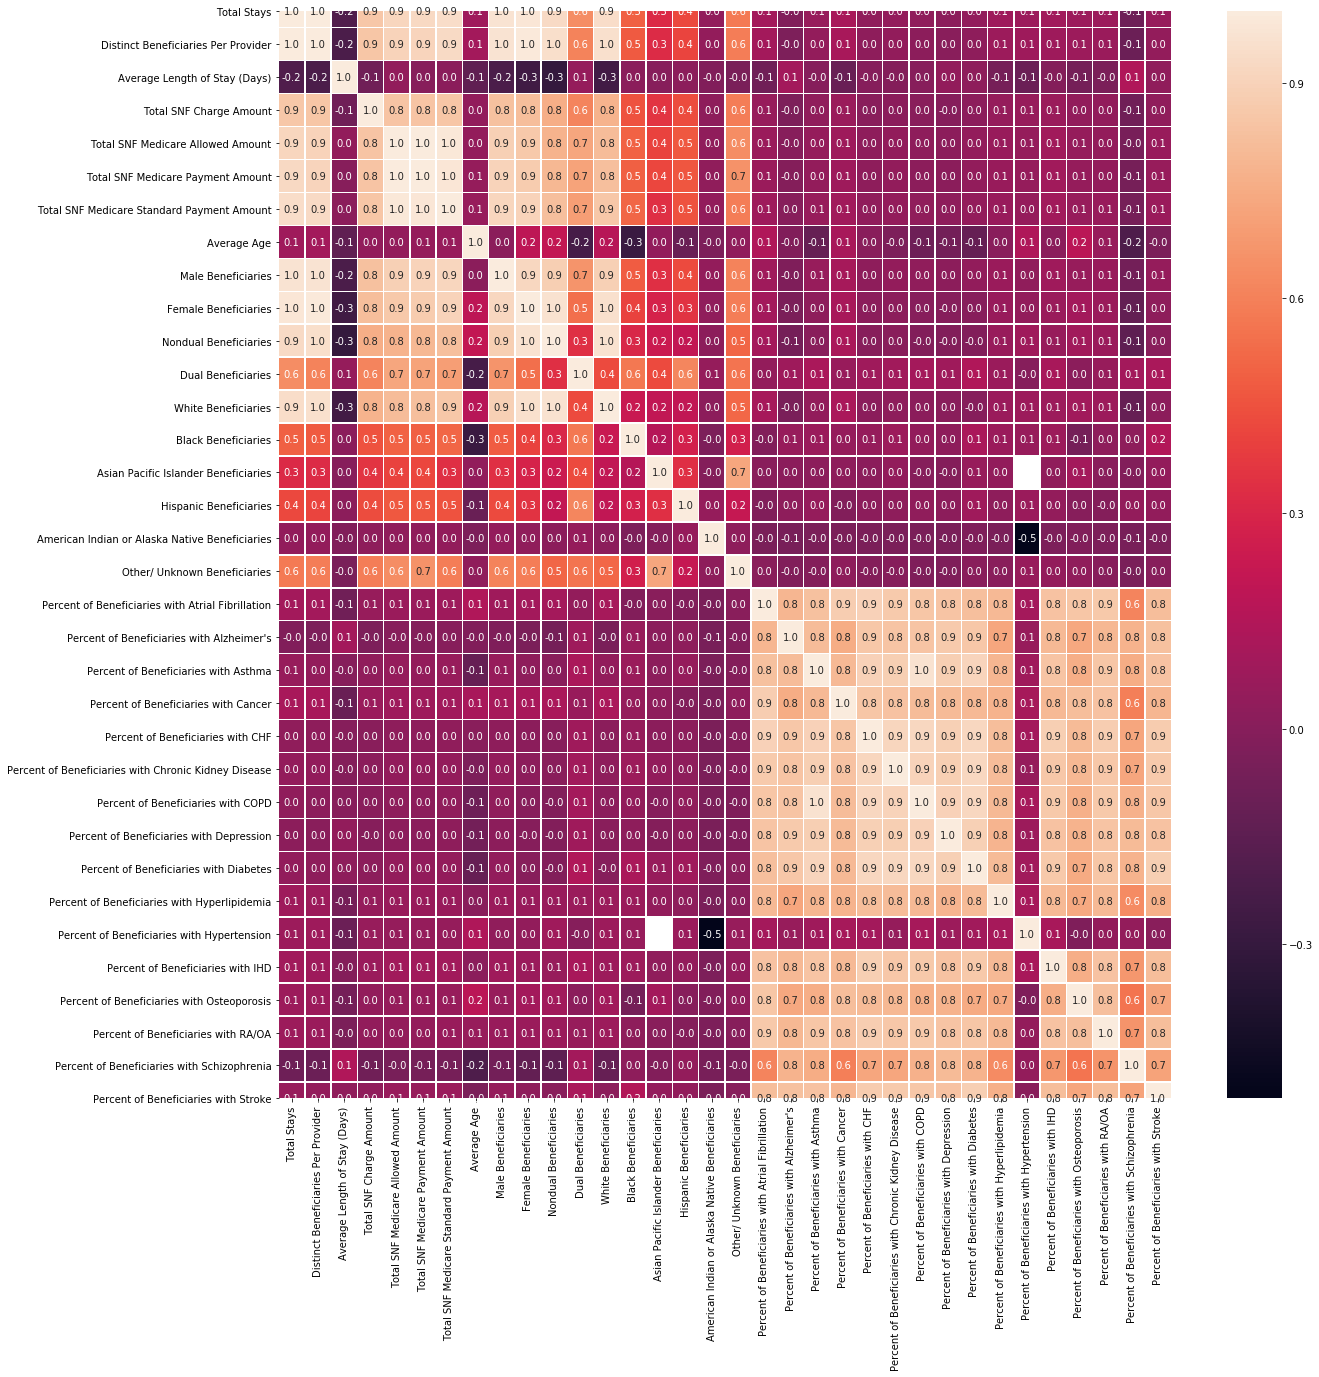

In [22]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data_scale.iloc[:,:-1].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [23]:
# Create correlation matrix
corr_matrix = data_scale.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] >0.99)]

#drop highly correlated column
data.drop(to_drop,inplace=True, axis=1)
data1_scale.drop(to_drop,inplace=True, axis=1)
data_scale.drop(to_drop,inplace=True, axis=1)

In [24]:
to_drop

['Distinct Beneficiaries Per Provider', 'Total SNF Medicare Payment Amount']

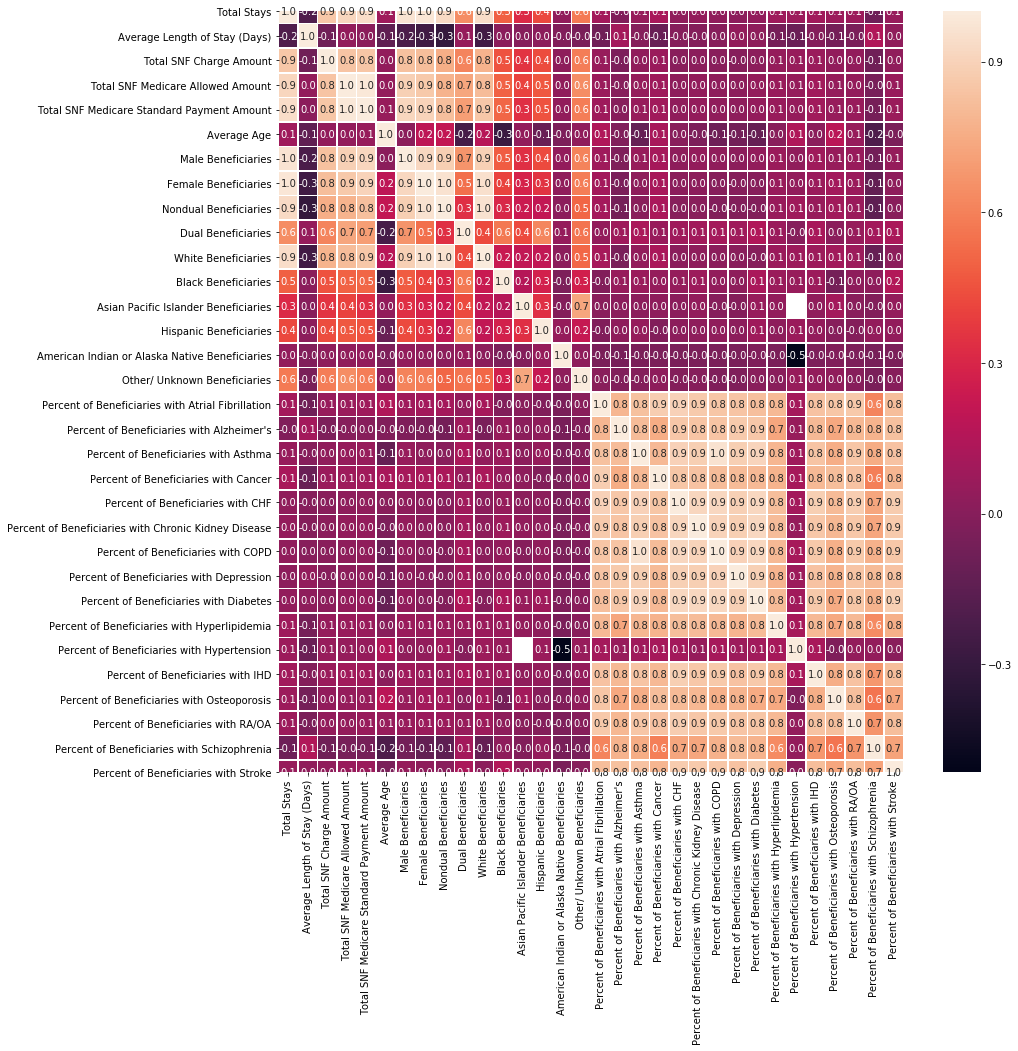

In [25]:
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(data_scale.iloc[:,:-1].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [26]:
#split scaled data into 0.8 training and 0.2 testing data
x_train, x_test, y_train, y_test = train_test_split(data, data_target, test_size=0.2, random_state=0)

In [27]:
#split scaled data into 0.8 training and 0.2 testing data
x_train1_s, x_test1_s, y_train1_s, y_test1_s = train_test_split(data1_scale.iloc[:,:-1], \
                                                    data1_scale["label"], test_size=0.2, random_state=0)

In [28]:
#split scaled data into 0.8 training and 0.2 testing data
x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(data_scale.iloc[:,:-1], \
                                                    data_scale["label"], test_size=0.2, random_state=0)

In [29]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train1_s, y_train1_s)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train1_s.columns[rfecv.support_])

/Users/hankchen/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/hankchen/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/hankchen/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/hankchen/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/hankchen/

/Users/hankchen/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/hankchen/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/hankchen/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/hankchen/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/hankchen/

/Users/hankchen/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/hankchen/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/hankchen/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/hankchen/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/hankchen/

/Users/hankchen/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/hankchen/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/hankchen/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/hankchen/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/hankchen/

/Users/hankchen/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/hankchen/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/hankchen/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/hankchen/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/hankchen/

/Users/hankchen/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Optimal number of features : 10
Best features : Index(['Total SNF Charge Amount', 'Total SNF Medicare Allowed Amount',
       'Average Age', 'White Beneficiaries', 'Black Beneficiaries',
       'Percent of Beneficiaries with CHF',
       'Percent of Beneficiaries with Chronic Kidney Disease',
       'Percent of Beneficiaries with COPD',
       'Percent of Beneficiaries with Diabetes',
       'Percent of Beneficiaries with Schizophrenia'],
      dtype='object')


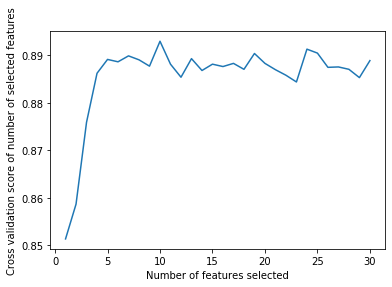

In [30]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [31]:
data11=x_train1_s[['Total SNF Medicare Standard Payment Amount', 'Average Age',
       'White Beneficiaries', 'Percent of Beneficiaries with CHF',
       'Percent of Beneficiaries with Chronic Kidney Disease',
       'Percent of Beneficiaries with Diabetes',
       'Percent of Beneficiaries with Schizophrenia']]

In [32]:
data12=x_test1_s[['Total SNF Medicare Standard Payment Amount', 'Average Age',
       'White Beneficiaries', 'Percent of Beneficiaries with CHF',
       'Percent of Beneficiaries with Chronic Kidney Disease',
       'Percent of Beneficiaries with Diabetes',
       'Percent of Beneficiaries with Schizophrenia']]

In [33]:
clf_rf = RandomForestClassifier() 
clf_rf.fit(data11,y_train1_s)
clf_rf.score(data12, y_test1_s)

/Users/hankchen/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8972055888223552

In [34]:

# Initialize an empty array to hold feature importances
feature_importances = np.zeros(x_train_s.shape[1])

# Create the model with several hyperparameters
model = xgb.XGBClassifier(random_state=0)

In [35]:
# Fit the model twice to avoid overfitting

    
# Split into training and validation set
train_features, valid_features, train_y, valid_y = train_test_split(x_train_s, y_train_s, test_size = 0.25, random_state = 0)

# Train using early stopping
model.fit(train_features, train_y)

# Record the feature importances
feature_importances = model.feature_importances_

In [36]:
feature_importances = pd.DataFrame({'feature': list(x_train_s.columns), 'importance': feature_importances}).sort_values('importance', ascending = False)

feature_importances.head()

,feature,importance
5,Average Age,0.237862
24,Percent of Beneficiaries with Diabetes,0.085538
21,Percent of Beneficiaries with Chronic Kidney D...,0.074612
11,Black Beneficiaries,0.060374
13,Hispanic Beneficiaries,0.048395


In [37]:
feature_importances.tail()

,feature,importance
18,Percent of Beneficiaries with Asthma,0.006551
15,Other/ Unknown Beneficiaries,0.000000
14,American Indian or Alaska Native Beneficiaries,0.000000
26,Percent of Beneficiaries with Hypertension,0.000000
4,Total SNF Medicare Standard Payment Amount,0.000000


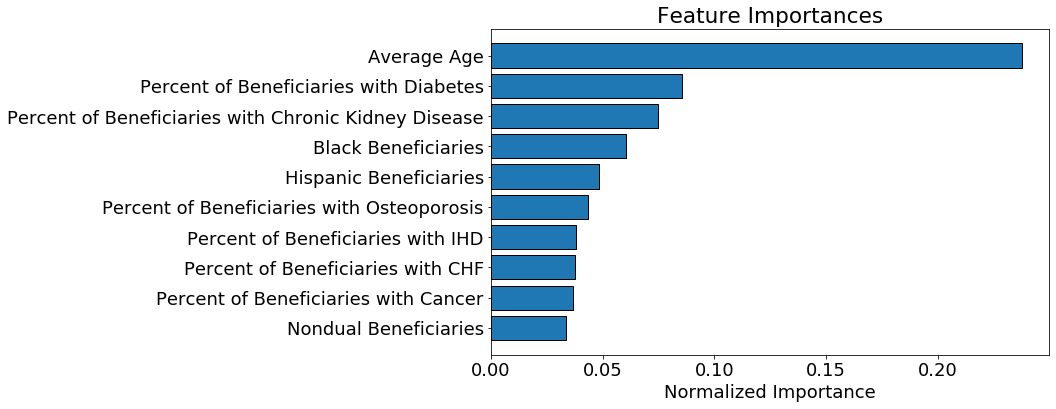

In [38]:
plt.rcParams['font.size'] = 18
    
# Sort features according to importance
df = feature_importances.sort_values('importance', ascending = False).reset_index()

# Normalize the feature importances to add up to one
df['importance_normalized'] = df['importance'] / df['importance'].sum()
df['cumulative_importance'] = np.cumsum(df['importance_normalized'])

# Make a horizontal bar chart of feature importances
plt.figure(figsize = (10, 6))
ax = plt.subplot()

# Need to reverse the index to plot most important on top
ax.barh(list(reversed(list(df.index[:10]))), 
        df['importance_normalized'].head(10), 
        align = 'center', edgecolor = 'k')

# Set the yticks and labels
ax.set_yticks(list(reversed(list(df.index[:10]))))
ax.set_yticklabels(df['feature'].head(10))

# Plot labeling
plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
plt.show()

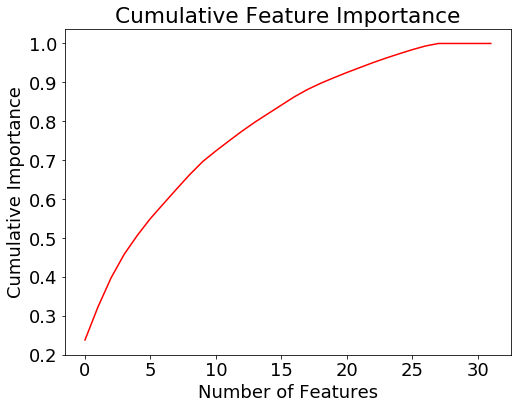

In [39]:
plt.figure(figsize = (8, 6))
plt.plot(list(range(len(df))), df['cumulative_importance'], 'r-')
plt.xlabel('Number of Features'); plt.ylabel('Cumulative Importance'); 
plt.title('Cumulative Feature Importance');
plt.show();

In [40]:
feature_importances

,feature,importance
5,Average Age,0.237862
24,Percent of Beneficiaries with Diabetes,0.085538
21,Percent of Beneficiaries with Chronic Kidney D...,0.074612
11,Black Beneficiaries,0.060374
13,Hispanic Beneficiaries,0.048395
28,Percent of Beneficiaries with Osteoporosis,0.043374
27,Percent of Beneficiaries with IHD,0.038008
20,Percent of Beneficiaries with CHF,0.037813
19,Percent of Beneficiaries with Cancer,0.037003
8,Nondual Beneficiaries,0.033701


In [41]:
# Find the features with zero importance
zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])
print('There are %d features with 0.0 importance' % len(zero_features))
feature_importances.tail()

There are 4 features with 0.0 importance


,feature,importance
18,Percent of Beneficiaries with Asthma,0.006551
15,Other/ Unknown Beneficiaries,0.000000
14,American Indian or Alaska Native Beneficiaries,0.000000
26,Percent of Beneficiaries with Hypertension,0.000000
4,Total SNF Medicare Standard Payment Amount,0.000000


In [42]:
x_train_s = x_train_s.drop(columns = zero_features)
x_test_s = x_test_s.drop(columns = zero_features)

print('Training shape: ', x_train_s.shape)
print('Testing shape: ', x_test_s.shape)

Training shape:  (12020, 28)
Testing shape:  (3006, 28)


In [43]:
# Initialize nine models with default parameters.

# Linear models (sigmoid activation).
lr_clf = LogisticRegression(random_state=0)
sgd_clf = SGDClassifier(random_state=0)

# Ensemble models.
dt_clf = DecisionTreeClassifier(random_state=0)
bag_dt_base_learner = DecisionTreeClassifier(random_state=0)
bag_dt_clf = BaggingClassifier(base_estimator=bag_dt_base_learner,
                                 random_state=0)
rf_clf = RandomForestClassifier(random_state=0)

# Boosting models.
ada_boost_base_learner = DecisionTreeClassifier(random_state=0)
ada_boost_clf = AdaBoostClassifier(base_estimator=ada_boost_base_learner,
                                     random_state=0)
gb_clf = GradientBoostingClassifier(random_state=0)
xgb_clf = xgb.XGBClassifier(random_state=0)
lgb_clf = lgb.LGBMClassifier(objective='binary',
                               random_state=0)

In [44]:
clfs1 = [lr_clf,sgd_clf,
        dt_clf,bag_dt_clf,rf_clf,
        ada_boost_clf,gb_clf]
train_acc=[]
test_acc=[]
for i in clfs1:
    i.fit(x_train1_s, y_train1_s)
    a=i.score(x_train1_s, y_train1_s)
    b=i.score(x_test1_s, y_test1_s)
    train_acc.append(a)
    test_acc.append(b)

/Users/hankchen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hankchen/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [45]:
clfs2 = [xgb_clf, lgb_clf]

for i in clfs2:
    i.fit(x_train_s, y_train_s)
    a=i.score(x_train_s, y_train_s)
    b=i.score(x_test_s, y_test_s)
    train_acc.append(a)
    test_acc.append(b)

In [46]:
clfs= ['lr','sgd','dt','bag_dt','rf','ada_boost','gb','xgb', 'lgb']

In [47]:
df = pd.DataFrame({'classifier': clfs, 'training accuracy': train_acc, 'testing accuracy': test_acc})
df

,classifier,training accuracy,testing accuracy
0,lr,0.871215,0.882236
1,sgd,0.862146,0.876580
2,dt,1.000000,0.860945
3,bag_dt,0.991181,0.898204
4,rf,0.991348,0.899534
5,ada_boost,1.000000,0.857618
6,gb,0.922463,0.913506
7,xgb,0.920383,0.910512
8,lgb,0.974126,0.904524


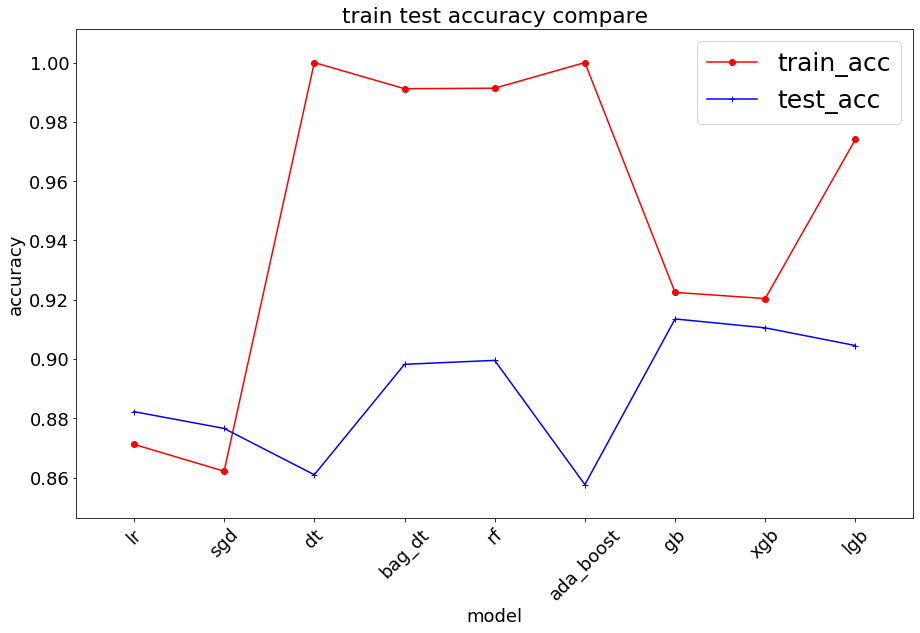

In [48]:
plt.figure(figsize=(15,10))
x = range(len(clfs))
plt.plot(x, train_acc,'ro-', label='train_acc')
plt.plot(x, test_acc, 'b+-', label='test_acc')

plt.xticks(x, clfs, rotation=45)
plt.margins(0.08)
plt.subplots_adjust(bottom=0.2)

plt.legend(loc='upper right', prop={'size': 25})
plt.xlabel('model')
plt.ylabel('accuracy')
plt.title('train test accuracy compare')

plt.show()



In [49]:
# Construct a decision tree regression model
tree_reg = DecisionTreeRegressor()

# Use the decision tree regression model as the base estimator
bag_reg = BaggingRegressor(base_estimator = tree_reg, n_estimators=100)

RF_reg = RandomForestRegressor(n_estimators = 100, max_depth = 25, min_samples_leaf = 5, random_state = 0)

GBDT_reg = GradientBoostingRegressor()

In [50]:
reg=[bag_reg, RF_reg, GBDT_reg]
reg1=['bag_reg', 'RF_reg', 'GBDT_reg']

In [51]:
mse=[]
r2=[]
for i in reg:
    i.fit(x_train1_s, y_train1_s)
    prediction=i.predict(x_test1_s)
    mse.append(mean_squared_error(y_test1_s, prediction))
    r2.append(r2_score(y_test1_s, prediction))

In [52]:
df1 = pd.DataFrame({'regression': reg1, 'mean square error': mse, 'r square': r2})
df1

,regression,mean square error,r square
0,bag_reg,0.071539,0.410693
1,RF_reg,0.070123,0.422353
2,GBDT_reg,0.068474,0.435942


In [53]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = gb_clf.predict(x_test1_s)

In [54]:
confusion_matrix(y_test1_s, predictions)

array([[2498,   83],
       [ 177,  248]])

In [55]:
print(classification_report(y_test1_s, predictions))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2581
           1       0.75      0.58      0.66       425

    accuracy                           0.91      3006
   macro avg       0.84      0.78      0.80      3006
weighted avg       0.91      0.91      0.91      3006

